In [3]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re
import pandas as pd
import string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
nltk.download('stopwords')
#set(stopwords.words("english"))
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lakshya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data=pd.read_csv("train.csv")

In [5]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
alphanumeric=lambda x: re.sub('\w*\d\w*',' ',x)
punc_lower=lambda x:re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower())
remove_n=lambda x:re.sub("\n"," ",x)
remove_non_ascii=lambda x:re.sub(r'[^\x00-\x7f]',r' ',x)


In [8]:
data["comment_text"]=data["comment_text"].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
data.comment_text.head()

0    explanation why the edits made under my userna...
1    d aww  he matches this background colour i m s...
2    hey man  i m really not trying to edit war  it...
3      more i can t make any real suggestions on im...
4    you  sir  are my hero  any chance you remember...
Name: comment_text, dtype: object

In [9]:
data.toxic.value_counts()
toxic_feat=data.iloc[:,2:].sum()




In [10]:
toxic_feat

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [11]:
num_rows=len(data)
print(num_rows)

159571


In [12]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [13]:
tox_per=data["toxic"].sum() / num_rows*100
sevTox_per=data["severe_toxic"].sum() / num_rows*100
obs_per=data["obscene"].sum() / num_rows*100
thr_per=data["threat"].sum() / num_rows*100
ins_per=data["insult"].sum() / num_rows*100
hate_per=data["identity_hate"].sum() / num_rows*100

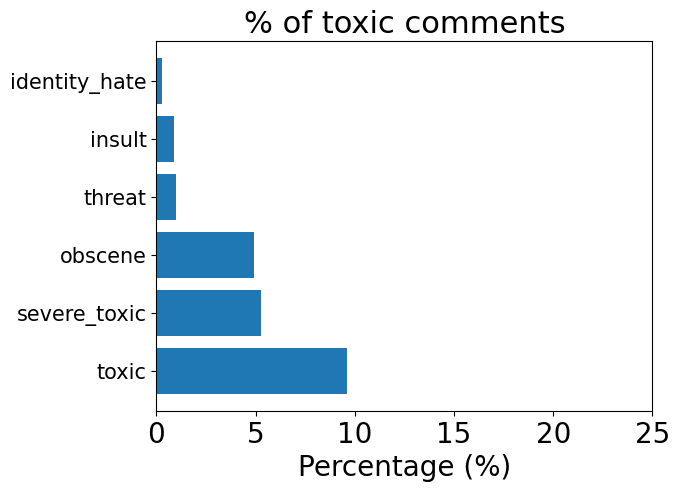

In [14]:
ind=np.arange(6)
graph=plt.barh(ind,[tox_per,obs_per,ins_per,sevTox_per,hate_per,thr_per])
plt.xlabel("Percentage (%)",size=20)
plt.title('% of toxic comments',size=22)
plt.xticks(np.arange(0,30,5),size=20)
plt.yticks(ind,('toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate',),size=15)
plt.show()

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

data_tox=data.loc[:,['id','comment_text','toxic']]
data_sev=data.loc[:,['id','comment_text','severe_toxic']]
data_obs=data.loc[:,['id','comment_text','obscene']]
data_thr=data.loc[:,['id','comment_text','threat']]
data_ins=data.loc[:,['id','comment_text','insult']]
data_ide=data.loc[:,['id','comment_text','identity_hate']]


In [17]:
def wordcloud(df,label):
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc=WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(text))
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words Frequented in {}".format(label),fontsize=20)
    plt.imshow(wc.recolor(colormap="gist_earth",random_state=244),alpha=0.98)



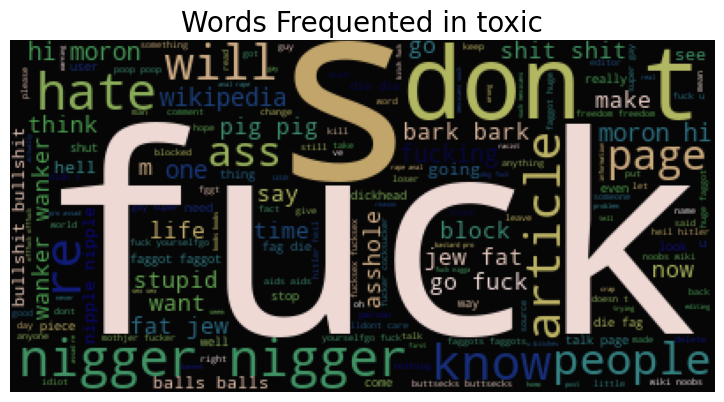

In [18]:
wordcloud(data_tox,"toxic")

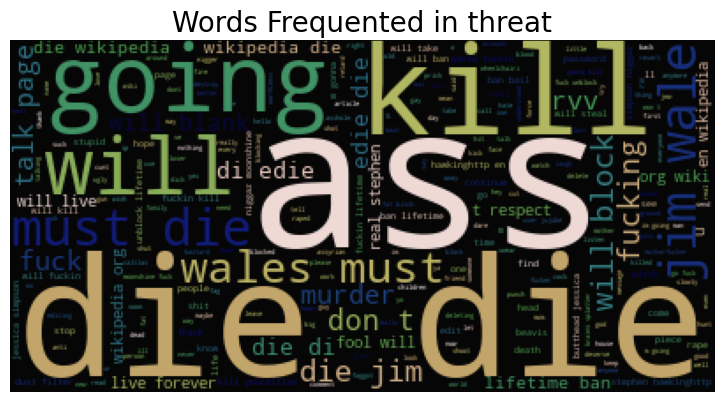

In [19]:
wordcloud(data_thr,"threat")

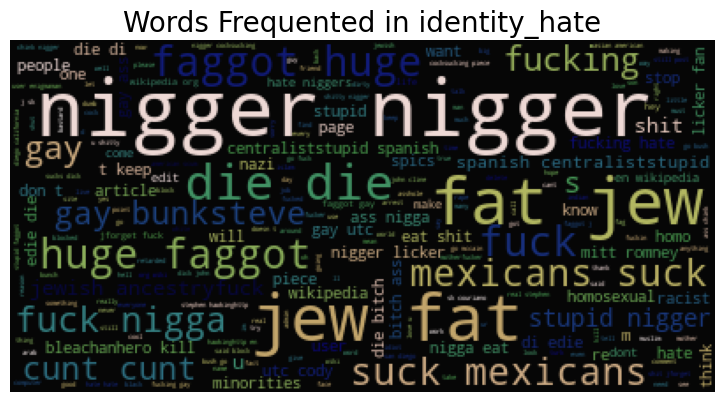

In [20]:
wordcloud(data_ide,"identity_hate")

In [21]:
data_tox["toxic"].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [22]:
data_istoxic=data_tox[data_tox["toxic"]==1].iloc[:5000,:]
data_nontoxic=data_tox[data_tox["toxic"]==0].iloc[:5000,:]
data_Toxic=pd.concat([data_istoxic,data_nontoxic],axis=0)
data_Toxic.shape


(10000, 3)

In [23]:
data_sev[data_sev["severe_toxic"]==1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [24]:
data_isSev=data_sev[data_sev["severe_toxic"]==1].iloc[0:1595,:]
data_nonSev=data_sev[data_sev["severe_toxic"]==0].iloc[0:1595,:]
data_severeToxic=pd.concat([data_isSev,data_nonSev],axis=0)
data_severeToxic.shape

(3190, 3)

In [25]:
data_isObs=data_obs[data_obs["obscene"]==1].iloc[0:5000,:]
data_nonObs=data_obs[data_obs["obscene"]==0].iloc[0:5000,:]
data_Obscene=pd.concat([data_isObs,data_nonObs],axis=0)
data_Obscene.shape

(10000, 3)

In [26]:
data_thr["threat"].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [27]:
data_thr[data_thr["threat"]==1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [28]:
data_isThr=data_thr[data_thr["threat"]==1].iloc[0:478,:]
data_nonThr=data_thr[data_thr["threat"]==0].iloc[0:1912,:]
data_Threat=pd.concat([data_isThr,data_nonThr],axis=0)


In [29]:
data_ins[data_ins["insult"]==1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [30]:
data_isIns=data_ins[data_ins["insult"]==1].iloc[0:5000,:]
data_nonIns=data_ins[data_ins["insult"]==0].iloc[0:5000,:]
data_Insult=pd.concat([data_isIns,data_nonIns],axis=0)



In [31]:
data_ide[data_ide["identity_hate"]==1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [32]:
data_isIde=data_ide[data_ide["identity_hate"]==1].iloc[0:1405,:]
data_nonIde=data_ide[data_ide["identity_hate"]==0].iloc[0:5620,:]
data_Hate=pd.concat([data_isIde,data_nonIde],axis=0)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

In [34]:
def model_train(data_toxicFeat,label,vectorizer,ngram):
    X=data_toxicFeat.comment_text
    y=data_toxicFeat[label]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    vect=vectorizer(ngram_range=(ngram),stop_words="english")
    X_train_vect=vect.fit_transform(X_train)
    X_test_vect=vect.transform(X_test)

    lr=LogisticRegression()
    lr.fit(X_train_vect,y_train)
    print("Logistic Regression Done")

    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_vect,y_train)
    print("KNearestNeighbours Done")


    svm_model=LinearSVC()
    svm_model.fit(X_train_vect,y_train)
    print("SupportVectorClassifier done")

    randomforest=RandomForestClassifier(n_estimators=100,random_state=42)
    randomforest.fit(X_train_vect,y_train)
    print("RandomForest done")

    f1_score_data={'F1 Score ({})'.format(label):
    [f1_score(lr.predict(X_test_vect),y_test),
    f1_score(knn.predict(X_test_vect),y_test),
#   f1_score(bnb.predict(X_test_vect),y_test),
#   f1_score(mnb.predict(X_test_vect),y_test),
    f1_score(svm_model.predict(X_test_vect),y_test),
    f1_score(randomforest.predict(X_test_vect),y_test)   ]}

    precision_score_data={'Precision Score ({})'.format(label):
    [precision_score(lr.predict(X_test_vect),y_test),
    precision_score(knn.predict(X_test_vect),y_test),
#   precision_score(bnb.predict(X_test_vect),y_test),
#   precision_score(mnb.predict(X_test_vect),y_test),
    precision_score(svm_model.predict(X_test_vect),y_test),
    precision_score(randomforest.predict(X_test_vect),y_test)]}

    recall_score_data={'recall Score ({})'.format(label):
    [recall_score(lr.predict(X_test_vect),y_test),
    recall_score(knn.predict(X_test_vect),y_test),
#   recall_score(bnb.predict(X_test_vect),y_test),
#   recall_score(mnb.predict(X_test_vect),y_test),
    recall_score(svm_model.predict(X_test_vect),y_test),
    recall_score(randomforest.predict(X_test_vect),y_test)]}


    data_f1=pd.DataFrame(f1_score_data,index=["Log Regression","KNN","SVM","Random Forest"])
    data_precision=pd.DataFrame(precision_score_data,index=["Log Regression","KNN","SVM","Random Forest"])
    data_recall=pd.DataFrame(recall_score_data,index=["Log Regression","KNN","SVM","Random Forest"])

    return data_f1,data_precision,data_recall






In [35]:
df_tox=model_train(data_Toxic,"toxic",TfidfVectorizer,(1,1)) 

Logistic Regression Done
KNearestNeighbours Done
SupportVectorClassifier done
RandomForest done


In [36]:
df_tox

(                F1 Score (toxic)
 Log Regression          0.861234
 KNN                     0.197560
 SVM                     0.876133
 Random Forest           0.838055,
                 Precision Score (toxic)
 Log Regression                 0.821731
 KNN                            0.110605
 SVM                            0.849057
 Random Forest                  0.779440,
                 recall Score (toxic)
 Log Regression              0.904728
 KNN                         0.923913
 SVM                         0.904993
 Random Forest               0.906203)

In [37]:
df_sev=model_train(data_severeToxic,"severe_toxic",TfidfVectorizer,(1,1))
df_sev

Logistic Regression Done
KNearestNeighbours Done
SupportVectorClassifier done
RandomForest done


(                F1 Score (severe_toxic)
 Log Regression                 0.927879
 KNN                            0.856046
 SVM                            0.926004
 Random Forest                  0.934874,
                 Precision Score (severe_toxic)
 Log Regression                        0.896050
 KNN                                   0.927235
 SVM                                   0.910603
 Random Forest                         0.925156,
                 recall Score (severe_toxic)
 Log Regression                     0.962054
 KNN                                0.795009
 SVM                                0.941935
 Random Forest                      0.944798)

In [38]:
df_obs=model_train(data_Obscene,"obscene",TfidfVectorizer,(1,1))
df_obs

Logistic Regression Done
KNearestNeighbours Done
SupportVectorClassifier done
RandomForest done


(                F1 Score (obscene)
 Log Regression            0.908655
 KNN                       0.515306
 SVM                       0.921378
 Random Forest             0.909091,
                 Precision Score (obscene)
 Log Regression                   0.864021
 KNN                              0.459987
 SVM                              0.895901
 Random Forest                    0.878334,
                 recall Score (obscene)
 Log Regression                0.958153
 KNN                           0.585750
 SVM                           0.948347
 Random Forest                 0.942080)

In [39]:
df_thr=model_train(data_Threat,"threat",TfidfVectorizer,(1,1))
df_thr

Logistic Regression Done
KNearestNeighbours Done
SupportVectorClassifier done
RandomForest done


(                F1 Score (threat)
 Log Regression           0.628821
 KNN                      0.720000
 SVM                      0.786765
 Random Forest            0.795539,
                 Precision Score (threat)
 Log Regression                  0.467532
 KNN                             0.642857
 SVM                             0.694805
 Random Forest                   0.694805,
                 recall Score (threat)
 Log Regression               0.960000
 KNN                          0.818182
 SVM                          0.906780
 Random Forest                0.930435)

In [40]:
df_ins=model_train(data_Insult,"insult",TfidfVectorizer,(1,1))
df_ins

Logistic Regression Done
KNearestNeighbours Done
SupportVectorClassifier done
RandomForest done


(                F1 Score (insult)
 Log Regression           0.896599
 KNN                      0.273790
 SVM                      0.902619
 Random Forest            0.883993,
                 Precision Score (insult)
 Log Regression                  0.857515
 KNN                             0.160052
 SVM                             0.874431
 Random Forest                   0.835394,
                 recall Score (insult)
 Log Regression               0.939416
 KNN                          0.946154
 SVM                          0.932686
 Random Forest                0.938596)

In [41]:
df_ide=model_train(data_Hate,"identity_hate",TfidfVectorizer,(1,1))
df_ide

Logistic Regression Done
KNearestNeighbours Done
SupportVectorClassifier done
RandomForest done


(                F1 Score (identity_hate)
 Log Regression                  0.697222
 KNN                             0.216433
 SVM                             0.797516
 Random Forest                   0.768448,
                 Precision Score (identity_hate)
 Log Regression                         0.570455
 KNN                                    0.122727
 SVM                                    0.729545
 Random Forest                          0.686364,
                 recall Score (identity_hate)
 Log Regression                      0.896429
 KNN                                 0.915254
 SVM                                 0.879452
 Random Forest                       0.872832)

In [42]:
f1_all=pd.concat([df_tox[0],df_sev[0],df_obs[0],df_ins[0],df_thr[0],df_ide[0]],axis=1)

In [43]:
f1_all

,F1 Score (toxic),F1 Score (severe_toxic),F1 Score (obscene),F1 Score (insult),F1 Score (threat),F1 Score (identity_hate)
Log Regression,0.861234,0.927879,0.908655,0.896599,0.628821,0.697222
KNN,0.197560,0.856046,0.515306,0.273790,0.720000,0.216433
SVM,0.876133,0.926004,0.921378,0.902619,0.786765,0.797516
Random Forest,0.838055,0.934874,0.909091,0.883993,0.795539,0.768448


In [44]:
f1_all_trp=f1_all.transpose()
f1_all_trp

,Log Regression,KNN,SVM,Random Forest
F1 Score (toxic),0.861234,0.197560,0.876133,0.838055
F1 Score (severe_toxic),0.927879,0.856046,0.926004,0.934874
F1 Score (obscene),0.908655,0.515306,0.921378,0.909091
F1 Score (insult),0.896599,0.273790,0.902619,0.883993
F1 Score (threat),0.628821,0.720000,0.786765,0.795539
F1 Score (identity_hate),0.697222,0.216433,0.797516,0.768448


In [45]:
Precision_all=pd.concat([df_tox[1],df_sev[1],df_obs[1],df_ins[1],df_thr[1],df_ide[1]],axis=1)

In [46]:
Precision_all_trp=Precision_all.transpose()
Precision_all_trp

,Log Regression,KNN,SVM,Random Forest
Precision Score (toxic),0.821731,0.110605,0.849057,0.779440
Precision Score (severe_toxic),0.896050,0.927235,0.910603,0.925156
Precision Score (obscene),0.864021,0.459987,0.895901,0.878334
Precision Score (insult),0.857515,0.160052,0.874431,0.835394
Precision Score (threat),0.467532,0.642857,0.694805,0.694805
Precision Score (identity_hate),0.570455,0.122727,0.729545,0.686364


In [47]:
Recall_all=pd.concat([df_tox[2],df_sev[2],df_obs[2],df_ins[2],df_thr[2],df_ide[2]],axis=1)
Recall_all_trp=Recall_all.transpose()
Recall_all_trp


,Log Regression,KNN,SVM,Random Forest
recall Score (toxic),0.904728,0.923913,0.904993,0.906203
recall Score (severe_toxic),0.962054,0.795009,0.941935,0.944798
recall Score (obscene),0.958153,0.585750,0.948347,0.942080
recall Score (insult),0.939416,0.946154,0.932686,0.938596
recall Score (threat),0.960000,0.818182,0.906780,0.930435
recall Score (identity_hate),0.896429,0.915254,0.879452,0.872832


In [48]:
data[data["toxic"]==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1,0,0,0,0,0
16,0007e25b2121310b,bye don t look come or think of comming ba...,1,0,0,0,0,0
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1,0,1,0,1,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,our previous conversation you fucking sh...,1,0,1,0,1,1
159514,ff39a2895fc3b40e,you are a mischievious pubic hair,1,0,0,0,1,0
159541,ffa33d3122b599d6,your absurd edits your absurd edits on great...,1,0,1,0,1,0
159546,ffb47123b2d82762,hey listen don t you ever delete my edi...,1,0,0,0,1,0


In [49]:
db_toxic=data.loc[:,["comment_text","toxic"]]
db_toxic.sample(10)

,comment_text,toxic
106857,considering my year old non smoking healthy...,0
19372,i m happy to create ceschi discography and mov...,0
6165,definitely need to start a talk page for this ...,0
141477,so what your saying is that estebo is threatni...,0
21068,i would draw his to your attention ip block...,0
43266,does it mean that for example a story of je...,0
122763,hansel and gretel in oh no it looks like...,0
71778,actually there are many references for wh...,0
34271,why do you horde diamonds and jewlry while ...,0
24528,how do you explain this edit why did another ...,0


In [50]:
db_toxic.shape

(159571, 2)

In [51]:
db_Toxic=db_toxic[db_toxic["toxic"]==1].iloc[0:15000,:]
db_nonToxic=db_toxic[db_toxic["toxic"]==0].iloc[0:15000,:]
toxic_dataset=pd.concat([db_Toxic,db_nonToxic],axis=0)
toxic_dataset.shape

(30000, 2)

In [52]:
from sklearn.pipeline import Pipeline
X=toxic_dataset["comment_text"]
y=toxic_dataset["toxic"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [53]:
steps=[("vectorizer",TfidfVectorizer(ngram_range=(1,1),stop_words="english")),
       ('randomforest',RandomForestClassifier(n_estimators=100,random_state=42))]

In [54]:
pipe=Pipeline(steps)
steps

[('vectorizer', TfidfVectorizer(stop_words='english')),
 ('randomforest', RandomForestClassifier(random_state=42))]

In [55]:
pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('randomforest', RandomForestClassifier(random_state=42))])

In [ ]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

In [ ]:
f1Score=f1_score(y_test,y_pred)
print(f1Score)

In [ ]:
preScore=precision_score(y_test,y_pred)
print(preScore)

In [ ]:
reScore=recall_score(y_test,y_pred)
print(reScore)

In [ ]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,y_pred)
print("Accuracy_Score",accu)


In [ ]:
import pickle

with open("Toxic_analyzer.pkl","wb") as f:
    pickle.dump(pipe,f)

In [ ]:
text="kill you"
y=pipe.predict([text])
y[0]